<a href="https://colab.research.google.com/github/songqsh/foo1/blob/master/src/fit-3-pts-by-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
  
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [0]:
%matplotlib inline
import numpy as np
import torch
import matplotlib.pyplot as plt

__Goal__

Our objective is to fit three points with two different methods. 

__Description__

We have interploated two points [here](fitting-two-pts-by-nn.ipynb) and simple linear nn is enough to have a perfect fitting. 

Given a target function $f(x) = |x|$, by taking three points on the curve as training data, it is not enough to just take linear nn since the three points may not be on a straight line. In this below, we train two different nonlinear networks, one has relu the other is sigmoid. 
Two different networks both give perfect 3-pt fitting. 
However, the resulting trained function is totally different from two different activation function. 

In [0]:
%run fit_3pts_02.py

In [0]:
#training data
batch_size = 3
#x_train = 2*torch.rand(batch_size,1)-1
x_train = torch.tensor([-.5, 0., .5]).reshape(3,1)
y_train = f(x_train)

__Method 1__

Use sigmoid

In [0]:
#model and optimizer
net1 = Net(1) #with method 1
learning_rate = 0.1
optimizer = torch.optim.SGD(net1.parameters(), lr=learning_rate)

In [0]:
# Train the model
num_epochs = 10000

for epoch in range(num_epochs):

    # Forward pass
    outputs = net1(x_train)
    loss = criterion(outputs, y_train)
    
    # Backward and optimize

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 2000 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 
                                                    num_epochs, loss.item()))

Epoch [2000/10000], Loss: 0.0523
Epoch [4000/10000], Loss: 0.0257
Epoch [6000/10000], Loss: 0.0000
Epoch [8000/10000], Loss: 0.0000
Epoch [10000/10000], Loss: 0.0000


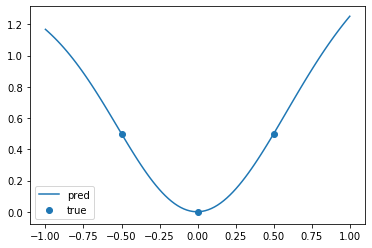

In [0]:
#test
y_ = f(x_train)
plt.scatter(x_train.detach().numpy(), y_.detach().numpy(), label='true')

x_test=torch.linspace(-1, 1, 100).reshape(100,1)
y_pred = net1(x_test)
plt.plot(x_test.detach().numpy(), y_pred.detach().numpy(), label='pred')

plt.legend()
plt.show()

__Method 2__

Use relu

In [0]:
#model and optimizer
net2 = Net(2) #with method 2
learning_rate = 0.1
optimizer = torch.optim.SGD(net2.parameters(), lr=learning_rate)

In [0]:
# Train the model
num_epochs = 1000

for epoch in range(num_epochs):

    # Forward pass
    outputs = net2(x_train)
    loss = criterion(outputs, y_train)
    
    # Backward and optimize

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 
                                                    num_epochs, loss.item()))

Epoch [100/1000], Loss: 0.0354
Epoch [200/1000], Loss: 0.0190
Epoch [300/1000], Loss: 0.0079
Epoch [400/1000], Loss: 0.0026
Epoch [500/1000], Loss: 0.0007
Epoch [600/1000], Loss: 0.0002
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000


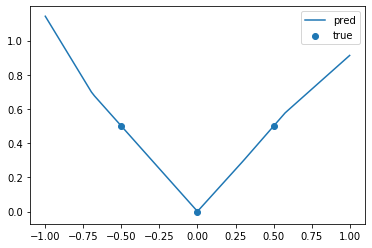

In [0]:
#test
y_ = f(x_train)
plt.scatter(x_train.detach().numpy(), y_.detach().numpy(), label='true')

x_test=torch.linspace(-1, 1, 100).reshape(100,1)
y_pred = net2(x_test)
plt.plot(x_test.detach().numpy(), y_pred.detach().numpy(), label='pred')

plt.legend()
plt.show()